<a href="https://colab.research.google.com/github/bfelt001/BigDataCompFinanceProject/blob/main/Assignment2_BigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import file for training data trainData.csv in the folder  Assignment 2 - Data that is in the google drive

# File path in Google Drive for training data csv
file_path1 = '/content/drive/My Drive/Big Data/Assignment 2 - Data/trainData.csv'

# Read the CSV file into a Pandas DataFrame
train_data = pd.read_csv(file_path1)


In [ ]:
train_data

,id,member_id,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,NaN,NaN,18600,10.99,608.86,B,6 years,RENT,80000.0,Fully Paid,...,0.0,0.0,0.0,15705.09,0.0,Individual,0.0,0.0,170238.0,20700.0
1,NaN,NaN,2000,17.97,72.28,D,4 years,MORTGAGE,55400.0,Current,...,0.0,0.0,0.0,72.28,0.0,Joint App,0.0,74.0,351452.0,10800.0
2,NaN,NaN,12000,12.29,400.24,C,10+ years,OWN,60000.0,Fully Paid,...,0.0,0.0,0.0,11281.15,0.0,Individual,0.0,0.0,18207.0,20600.0
3,NaN,NaN,16000,19.42,589.90,D,7 years,RENT,64000.0,Current,...,0.0,0.0,0.0,589.90,0.0,Individual,0.0,0.0,12293.0,7800.0
4,NaN,NaN,22525,16.02,548.01,C,10+ years,MORTGAGE,94080.0,Fully Paid,...,0.0,0.0,0.0,21483.11,0.0,Individual,0.0,250.0,571244.0,53800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226062,NaN,NaN,5000,7.21,154.87,A,3 years,RENT,46000.0,Current,...,0.0,0.0,0.0,154.87,0.0,Individual,0.0,5618.0,37430.0,20200.0
226063,NaN,NaN,35000,21.85,963.68,D,< 1 year,MORTGAGE,70000.0,Current,...,0.0,0.0,0.0,963.68,0.0,Individual,0.0,0.0,217083.0,9800.0
226064,NaN,NaN,1200,18.99,43.99,D,1 year,RENT,90000.0,Fully Paid,...,0.0,0.0,0.0,1197.23,0.0,Individual,0.0,0.0,76125.0,42100.0
226065,NaN,NaN,12000,8.90,381.04,A,< 1 year,OWN,35000.0,Fully Paid,...,0.0,0.0,0.0,9983.17,0.0,Individual,0.0,0.0,26386.0,43300.0


In [ ]:
# File path in Google Drive for training data csv
file_path2 = '/content/drive/My Drive/Big Data/Assignment 2 - Data/testData.csv'

# Read the CSV file into a Pandas DataFrame
test_data = pd.read_csv(file_path2)

In [ ]:
test_data

,id,member_id,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,NaN,NaN,8000,7.07,247.28,A,10+ years,MORTGAGE,78000.0,Fully Paid,...,0.0,0.0,0.0,6844.48,0.0,Individual,0.0,0.0,200412.0,16800.0
1,NaN,NaN,20000,7.21,619.47,A,3 years,RENT,78000.0,Current,...,0.0,0.0,0.0,619.47,0.0,Individual,0.0,0.0,39187.0,42100.0
2,NaN,NaN,20000,12.74,452.41,C,5 years,MORTGAGE,97000.0,Current,...,0.0,0.0,0.0,452.41,0.0,Individual,0.0,0.0,279688.0,6500.0
3,NaN,NaN,20000,8.81,634.23,A,10+ years,MORTGAGE,115000.0,Fully Paid,...,0.0,0.0,0.0,20015.91,0.0,Individual,0.0,0.0,172493.0,40200.0
4,NaN,NaN,20000,15.31,479.06,C,10+ years,OWN,75000.0,Fully Paid,...,0.0,0.0,0.0,478.99,0.0,Individual,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226062,NaN,NaN,7325,14.64,252.64,C,< 1 year,MORTGAGE,36000.0,Fully Paid,...,0.0,0.0,0.0,5154.62,0.0,Individual,0.0,0.0,63700.0,8000.0
226063,NaN,NaN,4000,10.91,130.79,B,2 years,RENT,105000.0,Fully Paid,...,0.0,0.0,0.0,3952.63,0.0,Individual,0.0,0.0,137869.0,23600.0
226064,NaN,NaN,6000,10.99,196.41,B,< 1 year,RENT,105000.0,Fully Paid,...,0.0,0.0,0.0,874.86,0.0,Individual,0.0,0.0,195653.0,15400.0
226065,NaN,NaN,13000,7.26,402.95,A,1 year,MORTGAGE,75000.0,Fully Paid,...,0.0,0.0,0.0,402.93,0.0,Individual,0.0,0.0,12821.0,26300.0


In [ ]:
# Creates “y”; value = 1 if the column “loan status” has the value “Charged Off” and 0 otherwise.

y = pd.Series([1 if row["loan_status"] == "Charged Off" else 0 for _, row in train_data.iterrows()])


In [ ]:
# Count how many 1 and 0 values in y. Checking for data imbalance

count_1 = y.value_counts()[1]
count_0 = y.value_counts()[0]

print(f"Number of 1s: {count_1}")
print(f"Number of 0s: {count_0}")
print(f"% 1: {count_1/(count_1+count_0)*100}")

Number of 1s: 26102
Number of 0s: 199965
% 1: 11.546134553030738


In [ ]:
# prompt: in train_data and test_data, see unique values of column grade. put the letters in order

unique_grades_train = train_data["grade"].unique()
unique_grades_test = test_data["grade"].unique()
all_unique_grades = sorted(set(unique_grades_train).union(set(unique_grades_test)))
print(all_unique_grades)


['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [ ]:
# Create new pandas dataframe called new_train_data and new_test_data

new_train_data = train_data.copy()
new_test_data = test_data.copy()


In [ ]:
# Numerize the letters, in order, for both train_data and test_data

grade_map = {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1}
new_train_data['grade'] = train_data['grade'].map(grade_map)
new_test_data['grade'] = train_data['grade'].map(grade_map)

In [ ]:
new_train_data["grade"]

0         6
1         4
2         5
3         4
4         5
         ..
226062    7
226063    4
226064    4
226065    7
226066    6
Name: grade, Length: 226067, dtype: int64

In [ ]:
emp_length_map = {
    '< 1 year': 0.5,
    '1 year': 1.0,
    '2 years': 2.0,
    '3 years': 3.0,
    '4 years': 4.0,
    '5 years': 5.0,
    '6 years': 6.0,
    '7 years': 7.0,
    '8 years': 8.0,
    '9 years': 9.0,
    '10+ years': 10.0
}

In [ ]:
new_train_data['emp_length'] = train_data['emp_length'].map(emp_length_map)
new_test_data['emp_length'] = test_data['emp_length'].map(emp_length_map)


In [ ]:

new_train_data['emp_length']


0          6.0
1          4.0
2         10.0
3          7.0
4         10.0
          ... 
226062     3.0
226063     0.5
226064     1.0
226065     0.5
226066    10.0
Name: emp_length, Length: 226067, dtype: float64

In [ ]:
#del new_test_data

In [ ]:
# prompt: print unique values of train_data['emp_length']

unique_emp_length = new_train_data['emp_length'].unique()
print(unique_emp_length)


[ 6.   4.  10.   7.   1.   9.   0.5  5.   3.   0.   8.   2. ]


In [ ]:
# Replace NaN values with 0
new_train_data['emp_length'] = new_train_data['emp_length'].fillna(0)
new_test_data['emp_length'] = new_test_data['emp_length'].fillna(0)


In [ ]:
train_data['home_ownership'].unique()
unique_homeown_train = train_data['home_ownership'].unique()
unique_homeown_test = test_data['home_ownership'].unique()
all_unique_homeown = sorted(set(unique_homeown_train).union(set(unique_homeown_test)))
print(all_unique_homeown)


['ANY', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT']


In [ ]:
# Count how many 'ANY' and 'NONE' and "OTHER' exist in train_data['home_ownership'] and test_data['home_ownership'] respectively

count_any_train = train_data['home_ownership'].value_counts()['ANY']
count_none_train = train_data['home_ownership'].value_counts()['NONE']
count_other_train = train_data['home_ownership'].value_counts()['OTHER']

count_any_test = test_data['home_ownership'].value_counts()['ANY']
count_none_test = test_data['home_ownership'].value_counts()['NONE']
count_other_test = test_data['home_ownership'].value_counts()['OTHER']

print(f"Count of 'ANY' in train_data: {count_any_train}")
print(f"Count of 'NONE' in train_data: {count_none_train}")
print(f"Count of 'OTHER' in train_data: {count_other_train}")

print(f"Count of 'ANY' in test_data: {count_any_test}")
print(f"Count of 'NONE' in test_data: {count_none_test}")
print(f"Count of 'OTHER' in test_data: {count_other_test}")


Count of 'ANY' in train_data: 100
Count of 'NONE' in train_data: 7
Count of 'OTHER' in train_data: 18
Count of 'ANY' in test_data: 103
Count of 'NONE' in test_data: 6
Count of 'OTHER' in test_data: 25


In [ ]:
# one hot encode home_ownership

new_train_data = pd.get_dummies(train_data, columns=['home_ownership'])
new_test_data = pd.get_dummies(test_data, columns=['home_ownership'])


In [ ]:
train_data.dtypes

id                            float64
member_id                     float64
loan_amnt                       int64
int_rate                      float64
installment                   float64
grade                          object
emp_length                     object
home_ownership                 object
annual_inc                    float64
loan_status                    object
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
mths_since_last_delinq        float64
open_acc                      float64
pub_rec                       float64
revol_bal                       int64
revol_util                    float64
total_acc                     float64
total_pymnt                   float64
total_pymnt_inv               float64
total_rec_prncp               float64
total_rec_int                 float64
total_rec_late_fee            float64
recoveries                    float64
collection_recovery_fee       float64
last_pymnt_a

In [ ]:
# drop 'loan_status' from new_train_data

new_train_data.drop('loan_status', axis=1, inplace=True)


In [ ]:
# prompt: get unique values from column application_type

unique_app_train = train_data['application_type'].unique()
unique_app_test = test_data['application_type'].unique()
all_unique_app = sorted(set(unique_app_train).union(set(unique_app_test)))
print(all_unique_app)

['Individual', 'Joint App']


In [ ]:
# one hot encode train_data['application_type'] and test_data['application_type']. add new columns to new_train_data and new_test_data

new_train_data = pd.get_dummies(new_train_data, columns=['application_type'])
new_test_data = pd.get_dummies(new_test_data, columns=['application_type'])


In [ ]:
new_train_data

,id,member_id,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,dti,delinq_2yrs,...,tot_cur_bal,total_rev_hi_lim,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,application_type_Individual,application_type_Joint App
0,NaN,NaN,18600,10.99,608.86,6,6.0,80000.0,12.92,0.0,...,170238.0,20700.0,False,False,False,False,False,True,True,False
1,NaN,NaN,2000,17.97,72.28,4,4.0,55400.0,10.62,1.0,...,351452.0,10800.0,False,True,False,False,False,False,False,True
2,NaN,NaN,12000,12.29,400.24,5,10.0,60000.0,17.92,0.0,...,18207.0,20600.0,False,False,False,False,True,False,True,False
3,NaN,NaN,16000,19.42,589.90,4,7.0,64000.0,3.90,1.0,...,12293.0,7800.0,False,False,False,False,False,True,True,False
4,NaN,NaN,22525,16.02,548.01,5,10.0,94080.0,19.08,1.0,...,571244.0,53800.0,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226062,NaN,NaN,5000,7.21,154.87,7,3.0,46000.0,19.44,0.0,...,37430.0,20200.0,False,False,False,False,False,True,True,False
226063,NaN,NaN,35000,21.85,963.68,4,0.5,70000.0,15.50,0.0,...,217083.0,9800.0,False,True,False,False,False,False,True,False
226064,NaN,NaN,1200,18.99,43.99,4,1.0,90000.0,23.15,0.0,...,76125.0,42100.0,False,False,False,False,False,True,True,False
226065,NaN,NaN,12000,8.90,381.04,7,0.5,35000.0,25.38,1.0,...,26386.0,43300.0,False,False,False,False,True,False,True,False


In [ ]:
new_train_data.drop('id', axis=1, inplace=True)
new_train_data.drop('member_id', axis=1, inplace=True)


In [ ]:
new_test_data.drop('id', axis=1, inplace=True)
new_test_data.drop('member_id', axis=1, inplace=True)

In [ ]:
new_test_data

,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,tot_cur_bal,total_rev_hi_lim,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,application_type_Individual,application_type_Joint App
0,8000,7.07,247.28,6,10.0,78000.0,Fully Paid,19.25,0.0,0.0,...,200412.0,16800.0,False,True,False,False,False,False,True,False
1,20000,7.21,619.47,4,3.0,78000.0,Current,23.06,0.0,0.0,...,39187.0,42100.0,False,False,False,False,False,True,True,False
2,20000,12.74,452.41,5,5.0,97000.0,Current,5.52,1.0,0.0,...,279688.0,6500.0,False,True,False,False,False,False,True,False
3,20000,8.81,634.23,4,10.0,115000.0,Fully Paid,16.84,0.0,2.0,...,172493.0,40200.0,False,True,False,False,False,False,True,False
4,20000,15.31,479.06,5,10.0,75000.0,Fully Paid,7.95,0.0,3.0,...,NaN,NaN,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226062,7325,14.64,252.64,7,0.5,36000.0,Fully Paid,14.03,0.0,2.0,...,63700.0,8000.0,False,True,False,False,False,False,True,False
226063,4000,10.91,130.79,4,2.0,105000.0,Fully Paid,13.87,0.0,1.0,...,137869.0,23600.0,False,False,False,False,False,True,True,False
226064,6000,10.99,196.41,4,0.5,105000.0,Fully Paid,9.25,0.0,0.0,...,195653.0,15400.0,False,False,False,False,False,True,True,False
226065,13000,7.26,402.95,7,1.0,75000.0,Fully Paid,5.31,0.0,0.0,...,12821.0,26300.0,False,True,False,False,False,False,True,False


In [ ]:
# test_y row["loan_status"] == "Charged Off" else 0 for new_test_data['loan_status']

test_y = pd.Series([1 if row["loan_status"] == "Charged Off" else 0 for _, row in new_test_data.iterrows()])


#Save/load new_train/test_data

In [ ]:
# save dataframes new_train_data, new_test_data, y, y test

new_train_data.to_csv('/content/drive/My Drive/Big Data/Assignment 2 - Data/new_train_data.csv', index=False)
new_test_data.to_csv('/content/drive/My Drive/Big Data/Assignment 2 - Data/new_test_data.csv', index=False)
#y.to_csv('/content/drive/My Drive/Big Data/Assignment 2 - Data/y.csv', index=False)
#test_y.to_csv('/content/drive/My Drive/Big Data/Assignment 2 - Data/test_y.csv', index=False)


In [ ]:
# call the csv files saved above back and assign them to pd dataframes

new_train_data = pd.read_csv('/content/drive/My Drive/Big Data/Assignment 2 - Data/new_train_data.csv')
new_test_data = pd.read_csv('/content/drive/My Drive/Big Data/Assignment 2 - Data/new_test_data.csv')
y = pd.read_csv('/content/drive/My Drive/Big Data/Assignment 2 - Data/y.csv')
test_y = pd.read_csv('/content/drive/My Drive/Big Data/Assignment 2 - Data/test_y.csv')


In [ ]:
new_test_data.drop('loan_status', axis=1, inplace=True)


KeyError: "['loan_status'] not found in axis"

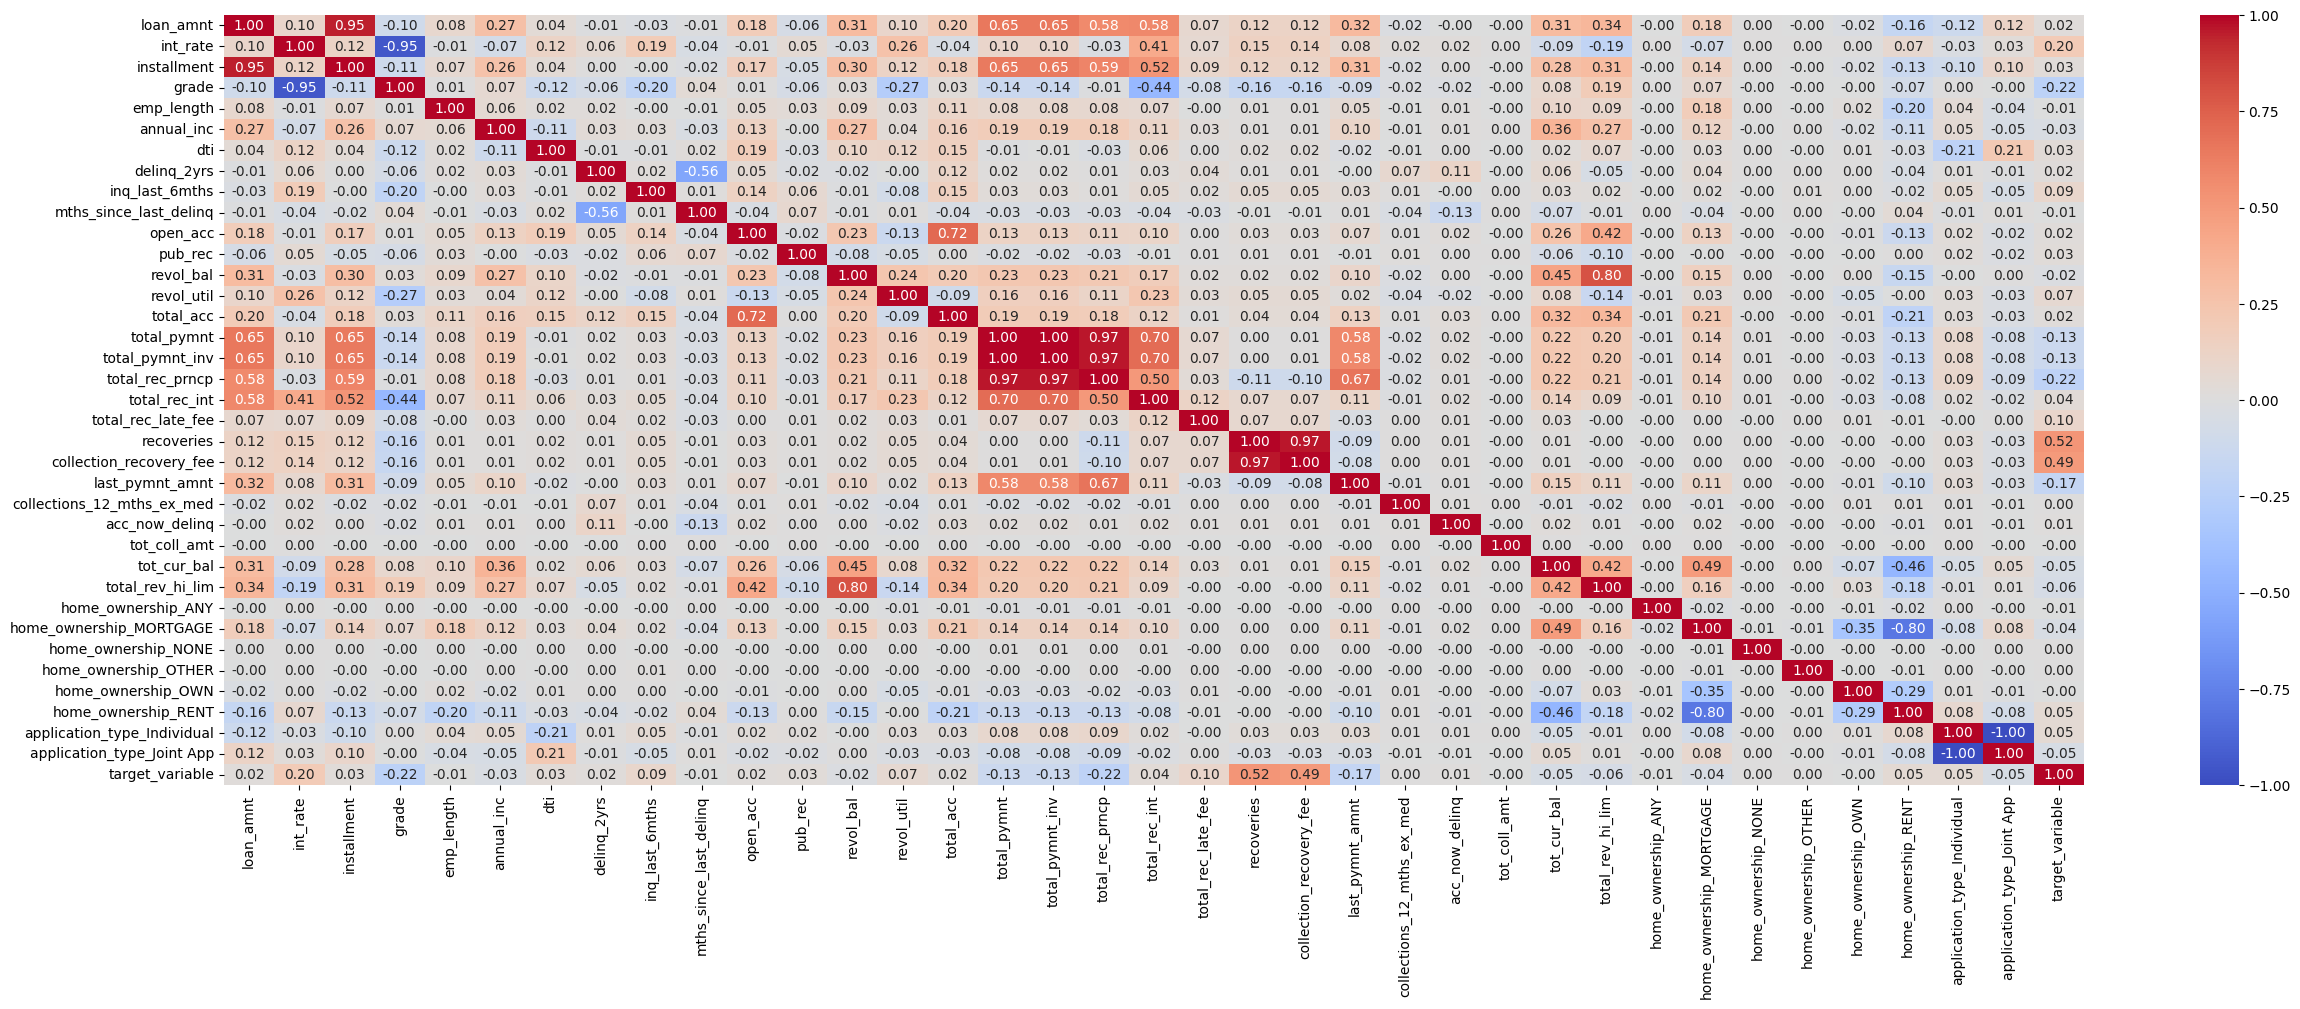

In [ ]:
# perform a correlation matrix with a chart on new_train_data. i want to see what the correlation is to dataframe y

# Assuming 'y' is a DataFrame with a single column, extract the Series
y_series = y.iloc[:, 0]

# Append y_series to new_train_data
new_train_data_with_y = new_train_data.copy()  # Create a copy to avoid modifying the original
new_train_data_with_y['target_variable'] = y_series  # Give a descriptive name to the 'y' column

# Calculate correlation matrix directly on the combined DataFrame
corr_matrix = new_train_data_with_y.corr()

# Create the heatmap
plt.figure(figsize=(30, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [ ]:
# check new_train_data for missing values

missing_values = new_test_data.isnull().sum()

# Print the number of missing values in each column
for column, missing_count in missing_values.items():
  print(f"Column: {column}, Missing values: {missing_count}")


Column: loan_amnt, Missing values: 0
Column: int_rate, Missing values: 0
Column: installment, Missing values: 0
Column: grade, Missing values: 0
Column: annual_inc, Missing values: 0
Column: dti, Missing values: 0
Column: delinq_2yrs, Missing values: 0
Column: inq_last_6mths, Missing values: 0
Column: mths_since_last_delinq, Missing values: 0
Column: open_acc, Missing values: 0
Column: pub_rec, Missing values: 0
Column: revol_bal, Missing values: 0
Column: revol_util, Missing values: 0
Column: total_acc, Missing values: 0
Column: total_pymnt, Missing values: 0
Column: total_pymnt_inv, Missing values: 0
Column: total_rec_prncp, Missing values: 0
Column: total_rec_int, Missing values: 0
Column: total_rec_late_fee, Missing values: 0
Column: recoveries, Missing values: 0
Column: collection_recovery_fee, Missing values: 0
Column: last_pymnt_amnt, Missing values: 0
Column: collections_12_mths_ex_med, Missing values: 0
Column: acc_now_delinq, Missing values: 0
Column: tot_coll_amt, Missing va

In [ ]:
# delete column emp_length from new_train_data and new_test_data
# deleted due to .18 high in correlation matrix and high amt values missing

del new_train_data['emp_length']
del new_test_data['emp_length']


In [ ]:
# use KNN on column dti in new_train_data and new_test_data, to fill in missing values

# Define the KNN imputer with k=5
knn_imputer = KNNImputer(n_neighbors=5)

# Fit the imputer on the training data
knn_imputer.fit(new_train_data[['dti']])

# Transform both training and test data
new_train_data[['dti']] = knn_imputer.transform(new_train_data[['dti']])
new_test_data[['dti']] = knn_imputer.transform(new_test_data[['dti']])


In [ ]:
# KNN to fill in missing values for delinq_2yrs

# Fit the imputer on the training data
knn_imputer.fit(new_train_data[['delinq_2yrs']])

# Transform both training and test data
new_train_data[['delinq_2yrs']] = knn_imputer.transform(new_train_data[['delinq_2yrs']])
new_test_data[['delinq_2yrs']] = knn_imputer.transform(new_test_data[['delinq_2yrs']])


Unique values in mths_since_last_delinq: [ nan  21.  33.  16.  14.  52.  74.  45.  26.  36.  35.  24.  12.  59.
  31.  49.   9.  23.  66.  65.  50.  75.  70.  56.  34.  15.  73.  54.
  28.  20.  25.   6.  17.  10.  63.  40.  61.  43.  68.  32.  13.   1.
  80.   7.   4.  30.  18.   2.  47.  76.   5.  41.  62.  11.  39.  72.
  22.  64.   3.  46.  71.  77.  27.  48.  57.  19.  29.  58.  37.  79.
  42.  78.  60.  67.  38.  53.   8.  44. 100.  81.  69.  55.  91.   0.
  51.  93.  85.  82. 101.  98. 108.  84.  83.  96.  95.  86.  97.  90.
  92.  88. 121.  87. 107. 106.  94. 128. 125.  89. 109. 103. 110. 112.
 117. 115. 161. 111. 105. 114. 113. 122. 120.  99. 134. 102. 124. 150.
 118. 131. 104. 123. 133. 135. 116. 146. 127. 119.]


<ipython-input-24-b2e6efad48e3>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_data['mths_since_last_delinq'])


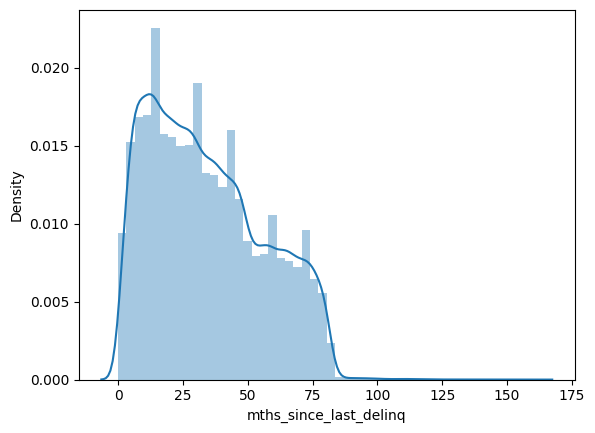

Correlation between mths_since_last_delinq and loan_amnt: -0.009221426489610133
Correlation between mths_since_last_delinq and int_rate: -0.0406619362577662
Correlation between mths_since_last_delinq and installment: -0.01770394610544187
Correlation between mths_since_last_delinq and grade: 0.044289733286819455
Correlation between mths_since_last_delinq and annual_inc: -0.03131343408955526
Correlation between mths_since_last_delinq and dti: 0.015887811209848158
Correlation between mths_since_last_delinq and delinq_2yrs: -0.5577538568551278
Correlation between mths_since_last_delinq and inq_last_6mths: 0.012468626052931708
Correlation between mths_since_last_delinq and open_acc: -0.036064961467600874
Correlation between mths_since_last_delinq and pub_rec: 0.07227437025126307
Correlation between mths_since_last_delinq and revol_bal: -0.014599464839664301
Correlation between mths_since_last_delinq and revol_util: 0.008565774122951246
Correlation between mths_since_last_delinq and total_ac

In [ ]:
# prompt: column mths_since_last_delinq has many missing values. let's investigate why that might be

# Check for unique values in the column
unique_values = new_train_data['mths_since_last_delinq'].unique()
print(f"Unique values in mths_since_last_delinq: {unique_values}")

# Check the distribution of the column
sns.distplot(new_train_data['mths_since_last_delinq'])
plt.show()

# Check for correlation between mths_since_last_delinq and other **individual** columns
# Calculate correlation with each column separately
for column in new_train_data.drop('mths_since_last_delinq', axis=1).columns:
    correlation = new_train_data['mths_since_last_delinq'].corr(new_train_data[column])
    print(f"Correlation between mths_since_last_delinq and {column}: {correlation}")

In [ ]:
# Replace missing values with -1
new_train_data['mths_since_last_delinq'] = new_train_data['mths_since_last_delinq'].fillna(-1)

# Create the new binary column
new_train_data['has_previous_delinquency'] = (new_train_data['mths_since_last_delinq'] != -1).astype(int)

In [ ]:
# Replace missing values with -1
new_test_data['mths_since_last_delinq'] = new_test_data['mths_since_last_delinq'].fillna(-1)

# Create the new binary column
new_test_data['has_previous_delinquency'] = (new_test_data['mths_since_last_delinq'] != -1).astype(int)

In [ ]:
# KNN to fill in missing values for open_acc

# Fit the imputer on the training data
knn_imputer.fit(new_train_data[['open_acc']])

# Transform both training and test data
new_train_data[['open_acc']] = knn_imputer.transform(new_train_data[['open_acc']])
new_test_data[['open_acc']] = knn_imputer.transform(new_test_data[['open_acc']])


In [ ]:

# KNN to fill in missing values for open_acc

# Fit the imputer on the training data
knn_imputer.fit(new_train_data[['annual_inc']])

# Transform both training and test data
new_train_data[['annual_inc']] = knn_imputer.transform(new_train_data[['annual_inc']])
new_test_data[['annual_inc']] = knn_imputer.transform(new_test_data[['annual_inc']])


In [ ]:
# KNN to fill in missing values for pub_rec

# Fit the imputer on the training data
knn_imputer.fit(new_train_data[['pub_rec']])

# Transform both training and test data
new_train_data[['pub_rec']] = knn_imputer.transform(new_train_data[['pub_rec']])
new_test_data[['pub_rec']] = knn_imputer.transform(new_test_data[['pub_rec']])

In [ ]:
# KNN to fill in missing values for revol_util

# Fit the imputer on the training data
knn_imputer.fit(new_train_data[['revol_util']])

# Transform both training and test data
new_train_data[['revol_util']] = knn_imputer.transform(new_train_data[['revol_util']])
new_test_data[['revol_util']] = knn_imputer.transform(new_test_data[['revol_util']])

In [ ]:
# KNN to fill in missing values for total_acc

# Fit the imputer on the training data
knn_imputer.fit(new_train_data[['total_acc']])

# Transform both training and test data
new_train_data[['total_acc']] = knn_imputer.transform(new_train_data[['total_acc']])
new_test_data[['total_acc']] = knn_imputer.transform(new_test_data[['total_acc']])

In [ ]:
# KNN to fill in missing values for collections_12_mths_ex_med

# Fit the imputer on the training data
knn_imputer.fit(new_train_data[['collections_12_mths_ex_med']])

# Transform both training and test data
new_train_data[['collections_12_mths_ex_med']] = knn_imputer.transform(new_train_data[['collections_12_mths_ex_med']])
new_test_data[['collections_12_mths_ex_med']] = knn_imputer.transform(new_test_data[['collections_12_mths_ex_med']])

In [ ]:
# KNN to fill in missing values for acc_now_delinq

# Fit the imputer on the training data
knn_imputer.fit(new_train_data[['acc_now_delinq']])

# Transform both training and test data
new_train_data[['acc_now_delinq']] = knn_imputer.transform(new_train_data[['acc_now_delinq']])
new_test_data[['acc_now_delinq']] = knn_imputer.transform(new_test_data[['acc_now_delinq']])

In [ ]:
#Column: tot_coll_amt, Missing values: 7107
#Column: tot_cur_bal, Missing values: 7107
#Column: total_rev_hi_lim, Missing values: 7107
# Impute missing values
new_train_data['tot_coll_amt'] = new_train_data['tot_coll_amt'].fillna(-1)
new_train_data['tot_cur_bal'] = new_train_data['tot_cur_bal'].fillna(-1)
new_train_data['total_rev_hi_lim'] = new_train_data['total_rev_hi_lim'].fillna(-1)


# Create binary flags
new_train_data['has_tot_coll_amt'] = (new_train_data['tot_coll_amt'] != -1).astype(int)
new_train_data['has_tot_cur_bal'] = (new_train_data['tot_cur_bal'] != -1).astype(int)
new_train_data['has_total_rev_hi_lim'] = (new_train_data['total_rev_hi_lim'] != -1).astype(int)


In [ ]:
#Column: tot_coll_amt, Missing values: 7027
#Column: tot_cur_bal, Missing values: 7027
#Column: total_rev_hi_lim, Missing values: 7027
# Impute missing values
new_test_data['tot_coll_amt'] = new_test_data['tot_coll_amt'].fillna(-1)
new_test_data['tot_cur_bal'] = new_test_data['tot_cur_bal'].fillna(-1)
new_test_data['total_rev_hi_lim'] = new_test_data['total_rev_hi_lim'].fillna(-1)


# Create binary flags
new_test_data['has_tot_coll_amt'] = (new_test_data['tot_coll_amt'] != -1).astype(int)
new_test_data['has_tot_cur_bal'] = (new_test_data['tot_cur_bal'] != -1).astype(int)
new_test_data['has_total_rev_hi_lim'] = (new_test_data['total_rev_hi_lim'] != -1).astype(int)

In [ ]:
# Analyze
print(new_train_data['has_tot_coll_amt'].value_counts(normalize=True))
print(new_train_data['has_tot_cur_bal'].value_counts(normalize=True))
print(new_train_data['has_total_rev_hi_lim'].value_counts(normalize=True))

has_tot_coll_amt
1    0.968562
0    0.031438
Name: proportion, dtype: float64
has_tot_cur_bal
1    0.968562
0    0.031438
Name: proportion, dtype: float64
has_total_rev_hi_lim
1    0.968562
0    0.031438
Name: proportion, dtype: float64


In [ ]:
# KNN to fill in missing values for inq_last_6mths

# Fit the imputer on the training data
knn_imputer.fit(new_train_data[['inq_last_6mths']])

# Transform both training and test data
new_train_data[['inq_last_6mths']] = knn_imputer.transform(new_train_data[['inq_last_6mths']])
new_test_data[['inq_last_6mths']] = knn_imputer.transform(new_test_data[['inq_last_6mths']])

#Normalization

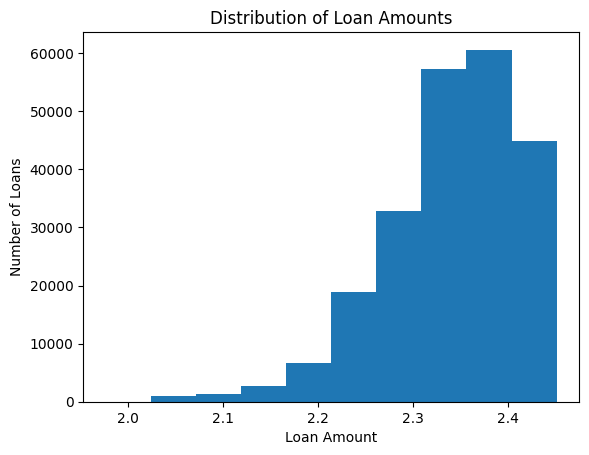

In [ ]:
# prompt: check column loan_amnt for distribution of data

# Get the loan_amnt column
loan_amnt = new_train_data['loan_amnt']

# Plot the distribution of loan_amnt
plt.hist(loan_amnt)
plt.xlabel('Loan Amount')
plt.ylabel('Number of Loans')
plt.title('Distribution of Loan Amounts')
plt.show()


In [ ]:
#log transformation of loan_amnt

new_train_data['loan_amnt'] = np.log1p(new_train_data[['loan_amnt']])
new_test_data['loan_amnt'] = np.log1p(new_test_data[['loan_amnt']])

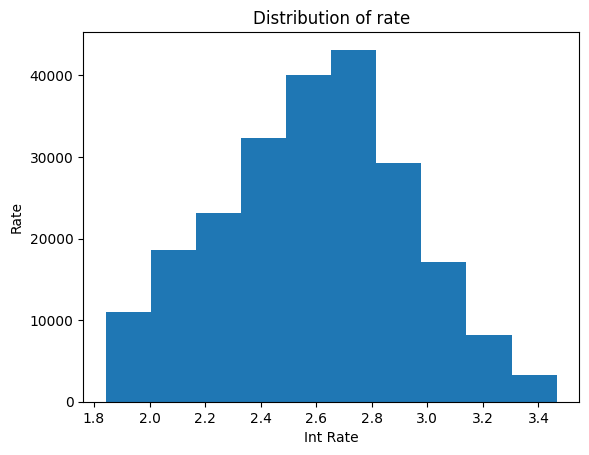

In [ ]:

# Get the loan_amnt column
int_rate = new_train_data['int_rate']

# Plot the distribution of loan_amnt
plt.hist(int_rate)
plt.xlabel('Int Rate')
plt.ylabel('Rate')
plt.title('Distribution of rate')
plt.show()

In [ ]:
#log transformation of int_rate

new_train_data['int_rate'] = np.log1p(new_train_data[['int_rate']])
new_test_data['int_rate'] = np.log1p(new_test_data[['int_rate']])

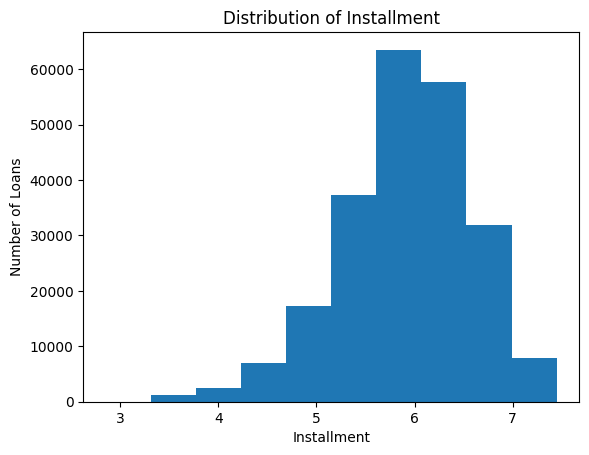

In [ ]:
# prompt: find distribution of installment

# Get the installment column
installment = new_train_data['installment']

# Plot the distribution of installment
plt.hist(installment)
plt.xlabel('Installment')
plt.ylabel('Number of Loans')
plt.title('Distribution of Installment')
plt.show()


In [ ]:
# log transformation of installment column

new_train_data['installment'] = np.log1p(new_train_data[['installment']])
new_test_data['installment'] = np.log1p(new_test_data[['installment']])


In [ ]:
# prompt: different values of annual_inc column in bins, just for analysis

bins = [0, 30000, 60000, 90000, 120000, 150000, 200000]
labels = ['0-30k', '30k-60k', '60k-90k', '90k-120k', '120k-150k', '150k+']
new_train_data['annual_inc_bins'] = pd.cut(new_train_data['annual_inc'], bins=bins, labels=labels)
print(new_train_data['annual_inc_bins'].value_counts())


annual_inc_bins
0-30k        225890
30k-60k           0
60k-90k           0
90k-120k          0
120k-150k         0
150k+             0
Name: count, dtype: int64


In [ ]:
# log transformation for column annual_inc

new_train_data['annual_inc'] = np.log1p(new_train_data[['annual_inc']])
new_test_data['annual_inc'] = np.log1p(new_test_data[['annual_inc']])


In [ ]:
new_train_data.dtypes

loan_amnt                      float64
int_rate                       float64
installment                    float64
grade                            int64
annual_inc                     float64
dti                            float64
delinq_2yrs                    float64
inq_last_6mths                 float64
mths_since_last_delinq         float64
open_acc                       float64
pub_rec                        float64
revol_bal                        int64
revol_util                     float64
total_acc                      float64
total_pymnt                    float64
total_pymnt_inv                float64
total_rec_prncp                float64
total_rec_int                  float64
total_rec_late_fee             float64
recoveries                     float64
collection_recovery_fee        float64
last_pymnt_amnt                float64
collections_12_mths_ex_med     float64
acc_now_delinq                 float64
tot_coll_amt                   float64
tot_cur_bal              

<ipython-input-14-547e16a25e85>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_data['dti'])


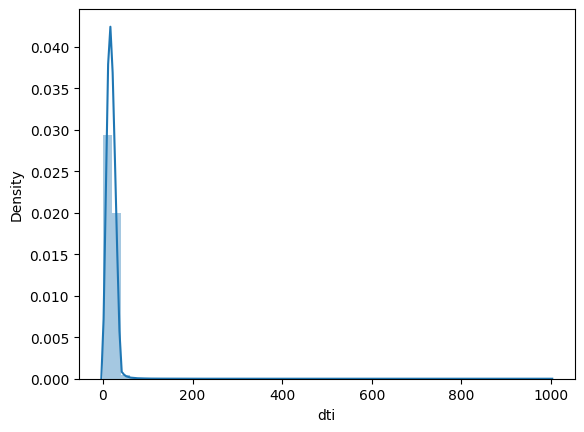

In [ ]:
# plot distribution of column dti

sns.distplot(new_train_data['dti'])
plt.show()


In [ ]:
# use standardscaler on column dti to normalize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(new_train_data[['dti']])

# Transform both training and test data
new_train_data[['dti']] = scaler.transform(new_train_data[['dti']])
new_test_data[['dti']] = scaler.transform(new_test_data[['dti']])


<ipython-input-13-65dc443916f0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_data['delinq_2yrs'])


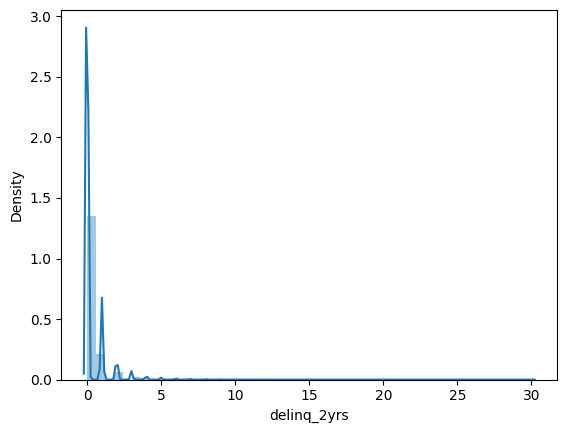

In [ ]:
# Plot the distribution of delinq_2yrs
sns.distplot(new_train_data['delinq_2yrs'])
plt.show()


In [ ]:
# describe delinq_2yrs

new_train_data['delinq_2yrs'].describe()


count    226067.000000
mean          0.308331
std           0.863630
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          30.000000
Name: delinq_2yrs, dtype: float64

In [ ]:
# MinMaxScaler on delinq_2yrs

from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(new_train_data[['delinq_2yrs']])

# Transform both training and test data
new_train_data[['delinq_2yrs']] = scaler.transform(new_train_data[['delinq_2yrs']])
new_test_data[['delinq_2yrs']] = scaler.transform(new_test_data[['delinq_2yrs']])


<ipython-input-16-b6d05352355a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_data['inq_last_6mths'])


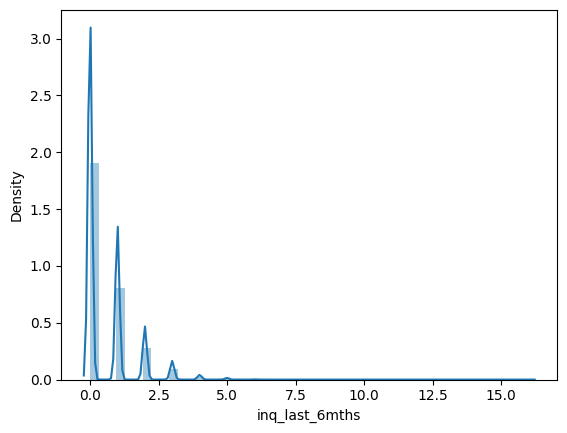

In [ ]:
# inq_last_6mths distribution

# Plot the distribution of inq_last_6mths
sns.distplot(new_train_data['inq_last_6mths'])
plt.show()


In [ ]:
# minmaxscaler on inq_last_6mths

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(new_train_data[['inq_last_6mths']])

# Transform both training and test data
new_train_data[['inq_last_6mths']] = scaler.transform(new_train_data[['inq_last_6mths']])
new_test_data[['inq_last_6mths']] = scaler.transform(new_test_data[['inq_last_6mths']])


<ipython-input-18-f0a663b7ce91>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_data['mths_since_last_delinq'])


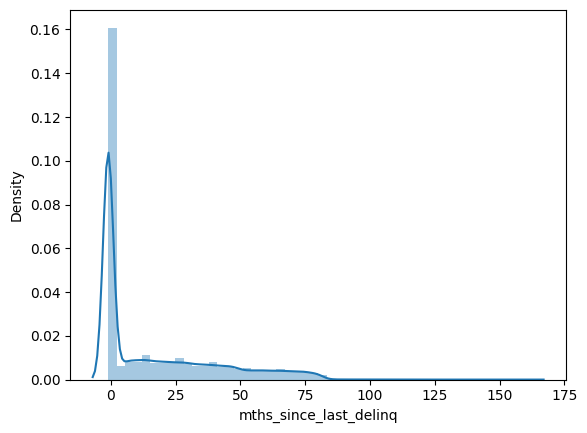

In [ ]:
# mths_since_last_delinq distrubution

sns.distplot(new_train_data['mths_since_last_delinq'])
plt.show()


In [ ]:
new_train_data['mths_since_last_delinq'].describe()

count    226067.000000
mean         16.289560
std          23.415697
min          -1.000000
25%          -1.000000
50%          -1.000000
75%          30.000000
max         161.000000
Name: mths_since_last_delinq, dtype: float64

In [ ]:
def log_transform_delinq(x):
    return np.log1p(x) if x >= 0 else x

new_train_data['mths_since_last_delinq'] = new_train_data['mths_since_last_delinq'].apply(log_transform_delinq)
new_test_data['mths_since_last_delinq'] = new_test_data['mths_since_last_delinq'].apply(log_transform_delinq)

<ipython-input-23-8a3a196a79af>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_data['open_acc'])


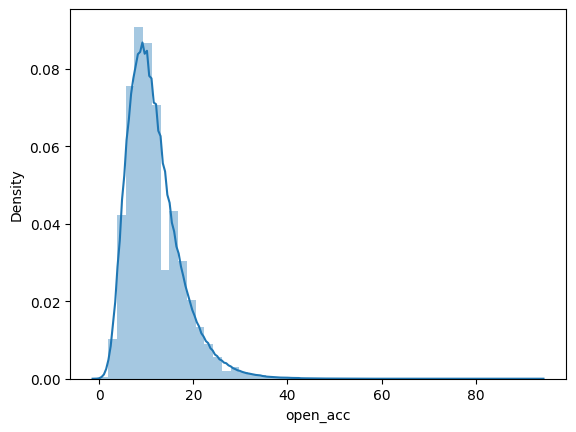

In [ ]:
# open_acc distribution

sns.distplot(new_train_data['open_acc'])
plt.show()


In [ ]:
# log transform open_acc

new_train_data['open_acc'] = np.log1p(new_train_data['open_acc'])
new_test_data['open_acc'] = np.log1p(new_test_data['open_acc'])


<ipython-input-26-b59679075c86>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_data['pub_rec'])


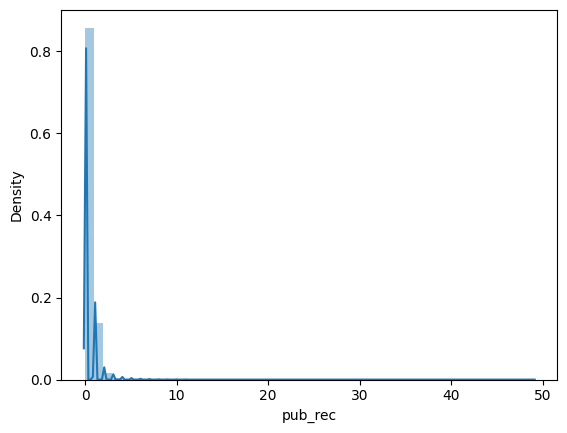

In [ ]:
# pub_rec distribution

sns.distplot(new_train_data['pub_rec'])
plt.show()


In [ ]:
new_train_data['pub_rec'].describe()

count    226067.000000
mean          0.199370
std           0.575267
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          49.000000
Name: pub_rec, dtype: float64

In [ ]:
# log transform pub_rec

new_train_data['pub_rec'] = np.log1p(new_train_data['pub_rec'])
new_test_data['pub_rec'] = np.log1p(new_test_data['pub_rec'])


<ipython-input-30-d1d74300a9d1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_data['revol_bal'])


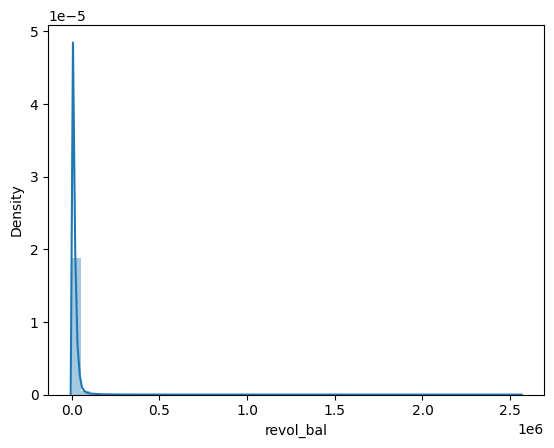

In [ ]:
# revol_bal distribution

sns.distplot(new_train_data['revol_bal'])
plt.show()


In [ ]:
new_train_data['revol_bal'].describe()

count    2.260670e+05
mean     1.664126e+04
std      2.355233e+04
min      0.000000e+00
25%      5.935500e+03
50%      1.134500e+04
75%      2.017900e+04
max      2.559552e+06
Name: revol_bal, dtype: float64

In [ ]:
# log transform revol_bal

new_train_data['revol_bal'] = np.log1p(new_train_data['revol_bal'])
new_test_data['revol_bal'] = np.log1p(new_test_data['revol_bal'])

<ipython-input-33-854bd00d8f56>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_data['revol_util'])


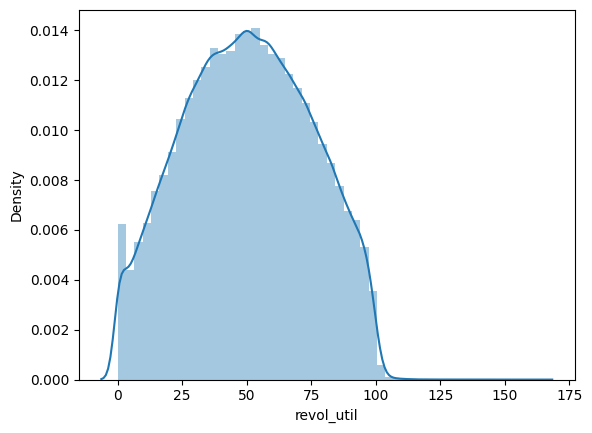

In [ ]:
# revol_util distribution

sns.distplot(new_train_data['revol_util'])
plt.show()


In [ ]:
new_train_data['revol_util'].describe()

count    226067.000000
mean         50.291585
std          24.740625
min           0.000000
25%          31.400000
50%          50.291585
75%          69.300000
max         162.100000
Name: revol_util, dtype: float64

In [ ]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(new_train_data[['revol_util']])

# Transform both training and test data
new_train_data[['revol_util']] = scaler.transform(new_train_data[['revol_util']])
new_test_data[['revol_util']] = scaler.transform(new_test_data[['revol_util']])


<ipython-input-36-455814332e20>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_data['total_acc'])


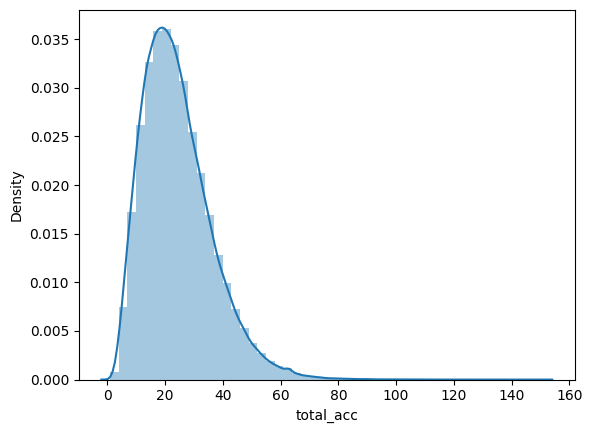

In [ ]:
# total_acc distribution

sns.distplot(new_train_data['total_acc'])
plt.show()


In [ ]:
new_train_data['total_acc'].describe()

count    226067.000000
mean         24.192363
std          12.006352
min           1.000000
25%          15.000000
50%          22.000000
75%          31.000000
max         151.000000
Name: total_acc, dtype: float64

In [ ]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(new_train_data[['total_acc']])

# Transform both training and test data
new_train_data[['total_acc']] = scaler.transform(new_train_data[['total_acc']])
new_test_data[['total_acc']] = scaler.transform(new_test_data[['total_acc']])


<ipython-input-40-617f63a78bd0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_data['total_pymnt'])


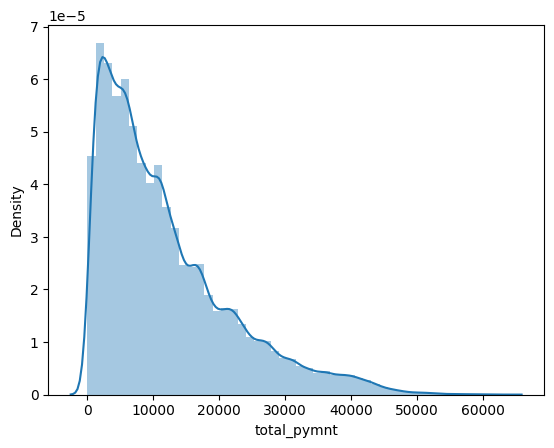

In [ ]:
# total_pymnt distribution

sns.distplot(new_train_data['total_pymnt'])
plt.show()


In [ ]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(new_train_data[['total_pymnt']])

# Transform both training and test data
new_train_data[['total_pymnt']] = scaler.transform(new_train_data[['total_pymnt']])
new_test_data[['total_pymnt']] = scaler.transform(new_test_data[['total_pymnt']])


In [ ]:
new_train_data.dtypes

loan_amnt                      float64
int_rate                       float64
installment                    float64
grade                            int64
annual_inc                     float64
dti                            float64
delinq_2yrs                    float64
inq_last_6mths                 float64
mths_since_last_delinq         float64
open_acc                       float64
pub_rec                        float64
revol_bal                      float64
revol_util                     float64
total_acc                      float64
total_pymnt                    float64
total_pymnt_inv                float64
total_rec_prncp                float64
total_rec_int                  float64
total_rec_late_fee             float64
recoveries                     float64
collection_recovery_fee        float64
last_pymnt_amnt                float64
collections_12_mths_ex_med     float64
acc_now_delinq                 float64
tot_coll_amt                   float64
tot_cur_bal              

<ipython-input-31-b1e8a3c5884e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_data['total_pymnt_inv'])


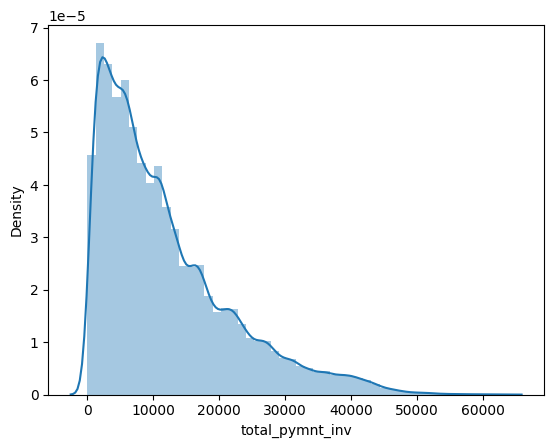

count    226067.000000
mean      11802.851304
std        9869.295469
min           0.000000
25%        4272.890000
50%        9061.470000
75%       16661.120000
max       63296.880000
Name: total_pymnt_inv, dtype: float64

In [ ]:
# total_pymnt_inv distribution

sns.distplot(new_train_data['total_pymnt_inv'])
plt.show()

new_train_data['total_pymnt_inv'].describe()


In [ ]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(new_train_data[['total_pymnt_inv']])

# Transform both training and test data
new_train_data[['total_pymnt_inv']] = scaler.transform(new_train_data[['total_pymnt_inv']])
new_test_data[['total_pymnt_inv']] = scaler.transform(new_test_data[['total_pymnt_inv']])


<ipython-input-46-7209e08e6691>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_data['total_rec_prncp'])


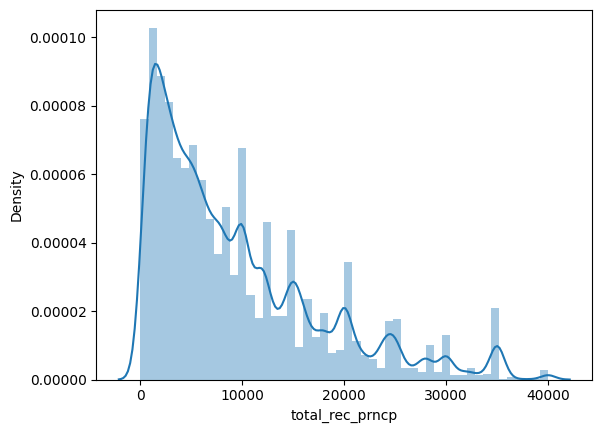

In [ ]:
# total_rec_prncp distribution

sns.distplot(new_train_data['total_rec_prncp'])
plt.show()


In [ ]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(new_train_data[['total_rec_prncp']])

# Transform both training and test data
new_train_data[['total_rec_prncp']] = scaler.transform(new_train_data[['total_rec_prncp']])
new_test_data[['total_rec_prncp']] = scaler.transform(new_test_data[['total_rec_prncp']])


<ipython-input-48-3ab44a9044b9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_data['total_rec_int'])


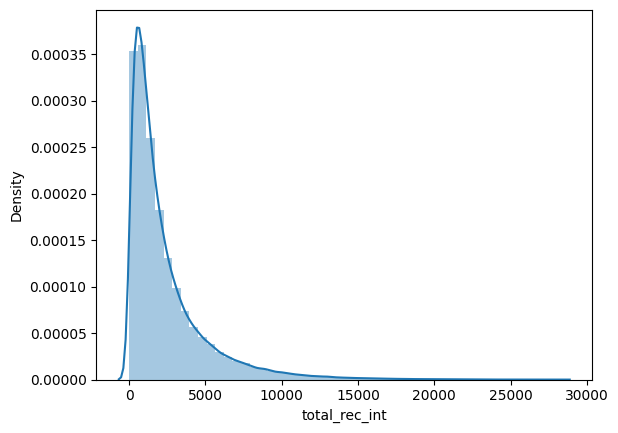

In [ ]:
# total_rec_int distribution

sns.distplot(new_train_data['total_rec_int'])
plt.show()

In [ ]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(new_train_data[['total_rec_int']])

# Transform both training and test data
new_train_data[['total_rec_int']] = scaler.transform(new_train_data[['total_rec_int']])
new_test_data[['total_rec_int']] = scaler.transform(new_test_data[['total_rec_int']])


<ipython-input-50-f0eef9fd0c1c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_data['total_rec_late_fee'])


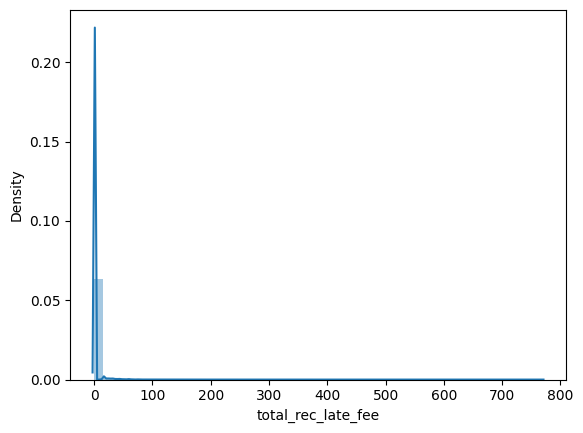

In [ ]:
# total_rec_late_fee distribution

sns.distplot(new_train_data['total_rec_late_fee'])
plt.show()


In [ ]:
#new_train_data['total_rec_late_fee'].describe()
new_test_data['total_rec_late_fee'].describe()

count    226067.000000
mean          1.462167
std          11.469513
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1098.360001
Name: total_rec_late_fee, dtype: float64

In [ ]:
# Replace negative values with 0
new_train_data['total_rec_late_fee'] = new_train_data['total_rec_late_fee'].clip(lower=0)


In [ ]:
# log transform total_rec_late_fee

new_train_data['total_rec_late_fee'] = np.log1p(new_train_data['total_rec_late_fee'])
new_test_data['total_rec_late_fee'] = np.log1p(new_test_data['total_rec_late_fee'])


<ipython-input-56-7f4671a18f8e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_data['recoveries'])


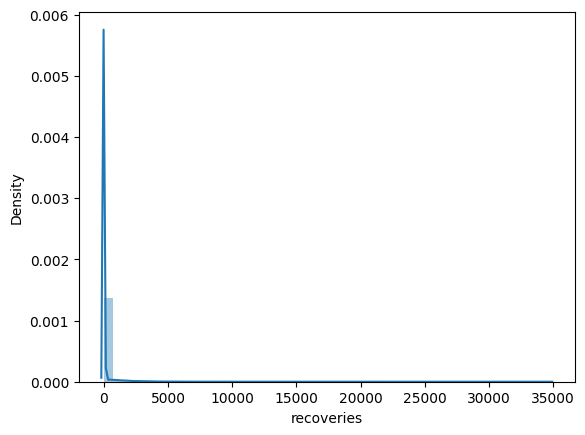

In [ ]:
# recoveries distribution

sns.distplot(new_train_data['recoveries'])
plt.show()


In [ ]:
new_train_data['recoveries'].describe()

count    226067.000000
mean        138.644682
std         740.937429
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       34740.400000
Name: recoveries, dtype: float64

In [ ]:
# log transform recoveries

new_train_data['recoveries'] = np.log1p(new_train_data['recoveries'])
new_test_data['recoveries'] = np.log1p(new_test_data['recoveries'])


<ipython-input-39-92c3c0e48c23>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_data['collection_recovery_fee'])


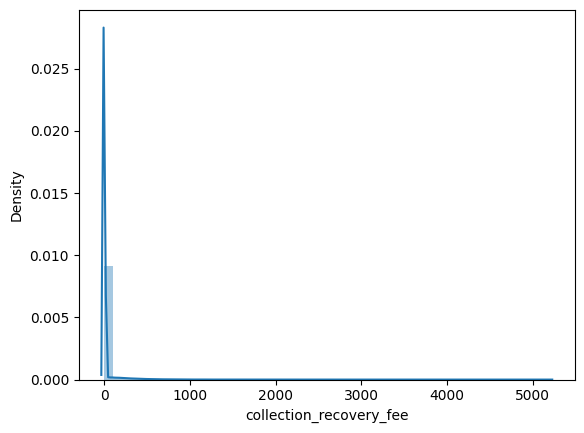

count    226067.000000
mean         23.055114
std         129.217751
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        5192.990000
Name: collection_recovery_fee, dtype: float64

In [ ]:
# collection_recovery_fee distribution

sns.distplot(new_train_data['collection_recovery_fee'])
plt.show()

new_train_data['collection_recovery_fee'].describe()


In [ ]:
# log transform collection_recovery_fee

new_train_data['collection_recovery_fee'] = np.log1p(new_train_data['collection_recovery_fee'])
new_test_data['collection_recovery_fee'] = np.log1p(new_test_data['collection_recovery_fee'])


<ipython-input-41-2d29c03d1b2f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_data['last_pymnt_amnt'])


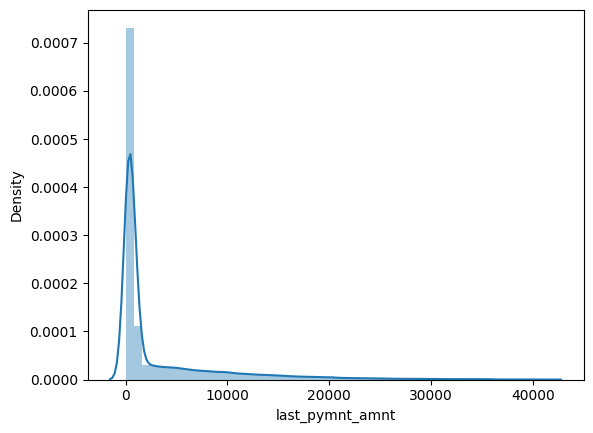

count    226067.000000
mean       3364.763642
std        5973.518321
min           0.000000
25%         309.210000
50%         587.920000
75%        3524.320000
max       41253.540000
Name: last_pymnt_amnt, dtype: float64

In [ ]:
# last_pymnt_amnt distribution

sns.distplot(new_train_data['last_pymnt_amnt'])
plt.show()

new_train_data['last_pymnt_amnt'].describe()


In [ ]:
# log transform last_pymnt_amnt

new_train_data['last_pymnt_amnt'] = np.log1p(new_train_data['last_pymnt_amnt'])
new_test_data['last_pymnt_amnt'] = np.log1p(new_test_data['last_pymnt_amnt'])


<ipython-input-43-8c7a9fac5daa>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_data['collections_12_mths_ex_med'])


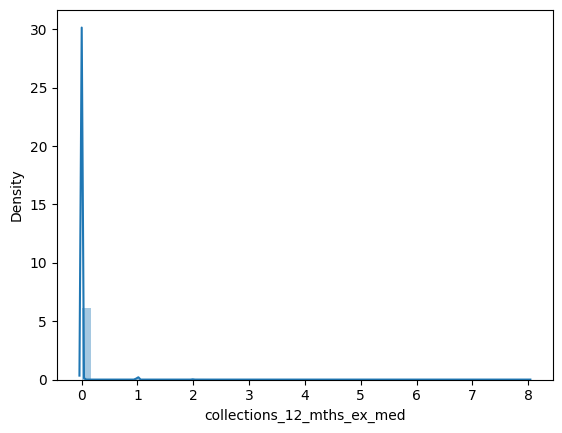

count    226067.000000
mean          0.017903
std           0.151468
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: collections_12_mths_ex_med, dtype: float64

In [ ]:
# collections_12_mths_ex_med distribution

sns.distplot(new_train_data['collections_12_mths_ex_med'])
plt.show()

new_train_data['collections_12_mths_ex_med'].describe()


In [ ]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(new_train_data[['collections_12_mths_ex_med']])

# Transform both training and test data
new_train_data[['collections_12_mths_ex_med']] = scaler.transform(new_train_data[['collections_12_mths_ex_med']])
new_test_data[['collections_12_mths_ex_med']] = scaler.transform(new_test_data[['collections_12_mths_ex_med']])


<ipython-input-45-e327205b4d45>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_data['acc_now_delinq'])


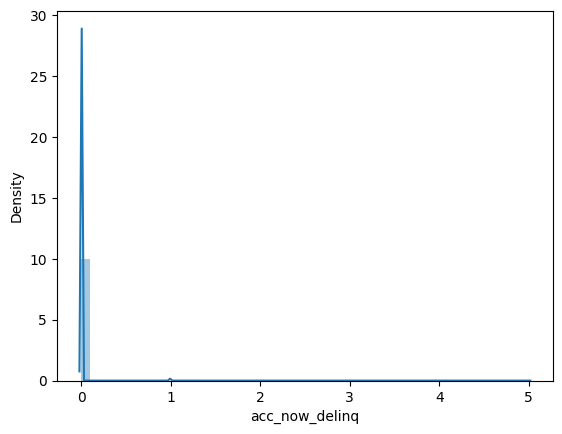

count    226067.000000
mean          0.004145
std           0.069218
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: acc_now_delinq, dtype: float64

In [ ]:
# acc_now_delinq distribution

sns.distplot(new_train_data['acc_now_delinq'])
plt.show()

new_train_data['acc_now_delinq'].describe()



In [ ]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(new_train_data[['acc_now_delinq']])

# Transform both training and test data
new_train_data[['acc_now_delinq']] = scaler.transform(new_train_data[['acc_now_delinq']])
new_test_data[['acc_now_delinq']] = scaler.transform(new_test_data[['acc_now_delinq']])

In [ ]:
new_train_data.dtypes

loan_amnt                      float64
int_rate                       float64
installment                    float64
grade                            int64
annual_inc                     float64
dti                            float64
delinq_2yrs                    float64
inq_last_6mths                 float64
mths_since_last_delinq         float64
open_acc                       float64
pub_rec                        float64
revol_bal                      float64
revol_util                     float64
total_acc                      float64
total_pymnt                    float64
total_pymnt_inv                float64
total_rec_prncp                float64
total_rec_int                  float64
total_rec_late_fee             float64
recoveries                     float64
collection_recovery_fee        float64
last_pymnt_amnt                float64
collections_12_mths_ex_med     float64
acc_now_delinq                 float64
tot_coll_amt                   float64
tot_cur_bal              

<ipython-input-80-4ca577c375b7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_data['tot_coll_amt'])


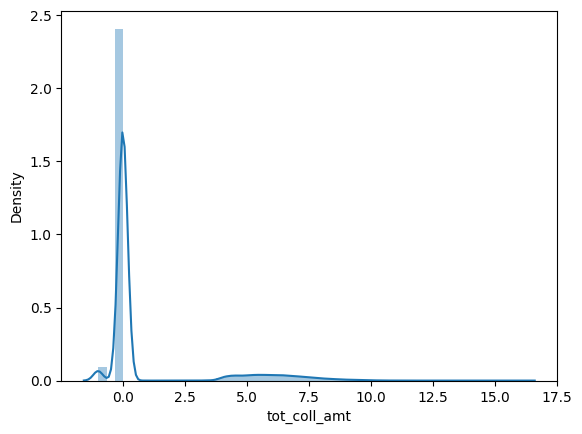

count    226067.000000
mean          0.872667
std           2.254785
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          16.029543
Name: tot_coll_amt, dtype: float64

In [ ]:
# tot_coll_amt distribution

sns.distplot(new_train_data['tot_coll_amt'])
plt.show()

new_train_data['tot_coll_amt'].describe()


In [ ]:
# log transform tot_coll_amt, ignore values -1

def log_transform_nonneg(x):
    return np.log1p(x) if x != -1 else x

new_train_data['tot_coll_amt'] = new_train_data['tot_coll_amt'].apply(log_transform_nonneg)
new_test_data['tot_coll_amt'] = new_test_data['tot_coll_amt'].apply(log_transform_nonneg)


<ipython-input-70-f4d0083af584>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_data['tot_cur_bal'])
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


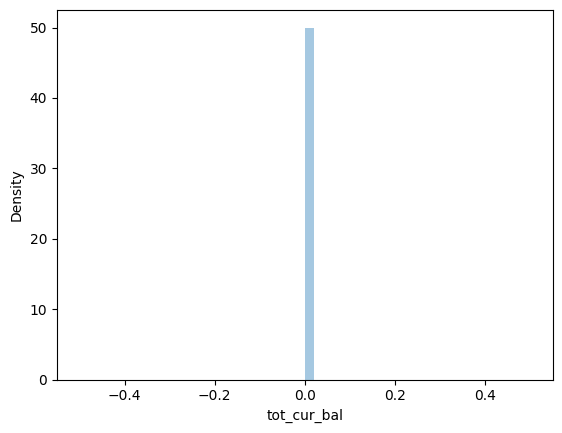

count    226067.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: tot_cur_bal, dtype: float64

In [ ]:
# tot_cur_bal distribution

sns.distplot(new_train_data['tot_cur_bal'])
plt.show()

new_train_data['tot_cur_bal'].describe()


In [ ]:
# log transform tot_cur_bal

def log_transform_nonneg(x):
    if x == -1:
        return x  # Preserve -1 values
    elif x >= 0:
        return np.log1p(x)  # Log transform non-negative values
    else:
        return np.log1p(0)  # Handle any remaining negative values

new_train_data['tot_cur_bal'] = np.log1p(new_train_data['tot_cur_bal']).apply(log_transform_nonneg)
new_test_data['tot_cur_bal'] = np.log1p(new_test_data['tot_cur_bal']).apply(log_transform_nonneg)


<ipython-input-81-25afbf140af1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_train_data['total_rev_hi_lim'])


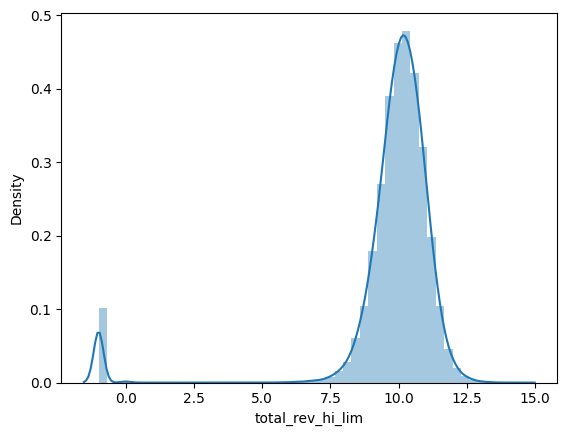

count    226067.000000
mean          9.758215
std           2.122811
min          -1.000000
25%           9.525151
50%          10.110502
75%          10.654904
max          14.444546
Name: total_rev_hi_lim, dtype: float64

In [ ]:
# total_rev_hi_lim distribution

sns.distplot(new_train_data['total_rev_hi_lim'])
plt.show()

new_train_data['total_rev_hi_lim'].describe()

In [ ]:
# log transform total_rev_hi_lim

new_train_data['total_rev_hi_lim'] = new_train_data['total_rev_hi_lim'].apply(log_transform_nonneg)
new_test_data['total_rev_hi_lim'] = new_test_data['total_rev_hi_lim'].apply(log_transform_nonneg)


In [ ]:
# drop new_train_data['annual_inc_bins']

new_train_data.drop('annual_inc_bins', axis=1, inplace=True)


#Save data to google drive

In [ ]:
# save dataframes new_train_data, new_test_data

new_train_data.to_csv('/content/drive/My Drive/Big Data/Assignment 2 - Data/TrainingDF.csv', index=False)
new_test_data.to_csv('/content/drive/My Drive/Big Data/Assignment 2 - Data/TestingDF.csv', index=False)

#Load data from google drive

In [3]:
# call the csv files saved above back and assign them to pd dataframes

TrainingDF = pd.read_csv('/content/drive/My Drive/Big Data/Assignment 2 - Data/TrainingDF.csv')
TestingDF = pd.read_csv('/content/drive/My Drive/Big Data/Assignment 2 - Data/TestingDF.csv')
y = pd.read_csv('/content/drive/My Drive/Big Data/Assignment 2 - Data/y.csv')
test_y = pd.read_csv('/content/drive/My Drive/Big Data/Assignment 2 - Data/test_y.csv')

In [4]:
# append y to TrainingDF

TrainingDF['y'] = y


Most Correlated Variables:
recoveries                 0.785060
collection_recovery_fee    0.759782
grade                      0.222951
total_rec_prncp            0.216278
last_pymnt_amnt            0.198958
int_rate                   0.195349
total_rec_late_fee         0.172278
total_pymnt                0.132429
total_pymnt_inv            0.132253
inq_last_6mths             0.087960
Name: y, dtype: float64

Least Correlated Variables:
home_ownership_NONE           0.002965
revol_bal                     0.003985
collections_12_mths_ex_med    0.004086
home_ownership_OWN            0.004701
home_ownership_ANY            0.005626
acc_now_delinq                0.010761
annual_inc                    0.012302
tot_coll_amt                  0.012466
mths_since_last_delinq        0.016246
total_acc                     0.016801
Name: y, dtype: float64


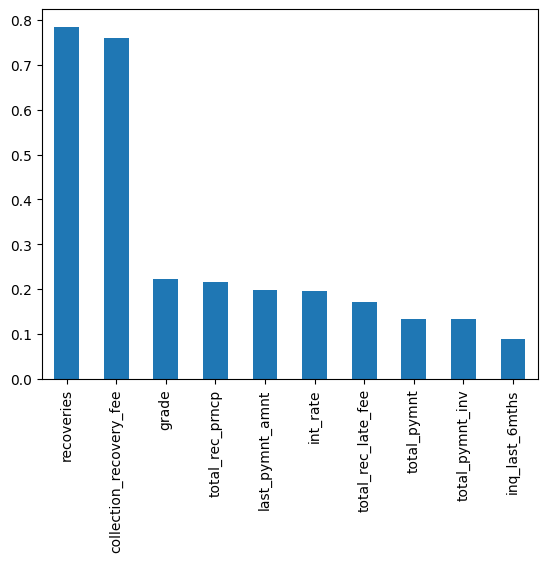

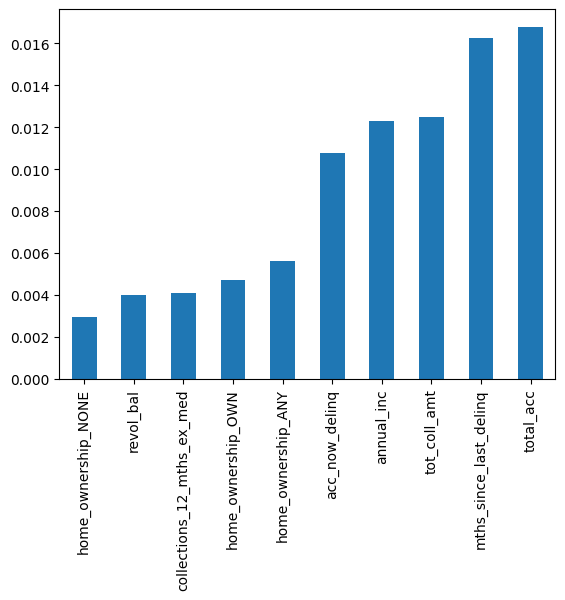

In [5]:
# Calculate the correlation matrix
corr_matrix = pd.DataFrame(TrainingDF).corr()

# Find the 10 most correlated variables
most_correlated = corr_matrix['y'].abs().sort_values(ascending=False)[1:11]

# Find the 10 least correlated variables
least_correlated = corr_matrix['y'].abs().sort_values()[1:11]

# Print the results
print("Most Correlated Variables:")
print(most_correlated)
print("\nLeast Correlated Variables:")
print(least_correlated)

#plot the most correlated variables calculated above
most_correlated.plot(kind='bar')
plt.show()

#plot the least correlated variables calculated above
least_correlated.plot(kind='bar')
plt.show()


In [6]:
# drop TrainingDF['y'] be4 training

TrainingDF.drop('y', axis=1, inplace=True)


In [27]:
# only use the top 10 variables from TrainingDF to create a new dataframe
# Train
top_10_correlated_train = TrainingDF[['recoveries', 'collection_recovery_fee', 'grade', 'total_rec_prncp', 'last_pymnt_amnt', 'int_rate', 'total_rec_late_fee', 'total_pymnt', 'total_pymnt_inv', 'inq_last_6mths']]

#Test
top_10_correlated_test = TestingDF[['recoveries', 'collection_recovery_fee', 'grade', 'total_rec_prncp', 'last_pymnt_amnt', 'int_rate', 'total_rec_late_fee', 'total_pymnt', 'total_pymnt_inv', 'inq_last_6mths']]


#Linear Regression Models

In [24]:
# Function to calculate accuracy
def calculate_accuracy(y_true, y_pred, threshold=0.5):
    return np.mean(np.abs(y_true - y_pred) <= threshold)

In [25]:
# Fit a linear regression model to TrainingDF and TestingDF, find mse

# Set train/test
X_train = TrainingDF
X_test = TestingDF
y_train = y
y_test = test_y

# Split the training data into training and validation sets (80/20 split)
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the Ridge regression model
model = LinearRegression()
model.fit(X_train_new, y_train_new)

# Evaluate on the validation set
y_val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_accuracy = calculate_accuracy(y_val, y_val_pred)
print(f"Validation MSE: {val_mse}")
print(f"Validation Accuracy: {val_accuracy}")

# Evaluate on the original training data
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_accuracy = calculate_accuracy(y_train, y_train_pred)
print(f"MSE on original training data: {train_mse}")
print(f"Accuracy on original training data: {train_accuracy}")

# Evaluate on the test data
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_accuracy = calculate_accuracy(y_test, y_test_pred)
print(f"MSE on test data: {test_mse}")
print(f"Accuracy on test data: {test_accuracy}")

Validation MSE: 0.036683893004992
Validation Accuracy: 0.9591055867651612
MSE on original training data: 0.03585237883354618
Accuracy on original training data: 0.9600295487620927
MSE on test data: 0.03932960488586086
Accuracy on test data: 0.9586538504071802


In [28]:
# Fit a linear regression model to top 10 correlated TrainingDF and TestingDF, find mse

# Set train/test
X_train = top_10_correlated_train
X_test = top_10_correlated_test
y_train = y
y_test = test_y

# Split the training data into training and validation sets (80/20 split)
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the Ridge regression model
model = LinearRegression()
model.fit(X_train_new, y_train_new)

# Evaluate on the validation set
y_val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_accuracy = calculate_accuracy(y_val, y_val_pred)
print(f"Validation MSE: {val_mse}")
print(f"Validation Accuracy: {val_accuracy}")

# Evaluate on the original training data
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_accuracy = calculate_accuracy(y_train, y_train_pred)
print(f"MSE on original training data: {train_mse}")
print(f"Accuracy on original training data: {train_accuracy}")

# Evaluate on the test data
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_accuracy = calculate_accuracy(y_test, y_test_pred)
print(f"MSE on test data: {test_mse}")
print(f"Accuracy on test data: {test_accuracy}")

Validation MSE: 0.03760280216642685
Validation Accuracy: 0.9592161719821294
MSE on original training data: 0.03683355160273519
Accuracy on original training data: 0.9600605130337466
MSE on test data: 0.040137976170413515
Accuracy on test data: 0.9586405800050427


#Ridge Models

In [29]:
def ridge_regression_mse(X, y, lambda_value):
    model = Ridge(alpha=lambda_value)
    model.fit(X, y)
    y_pred = model.predict(X)
    return mean_squared_error(y, y_pred)

In [30]:
# Fit a ridge regression model to TrainingDF and TestingDF, same lambdas, find mse/lambda of best model

# Define the training data
X_train = TrainingDF
y_train = y
X_test = TestingDF
y_test = test_y

# Split the training data into training and validation sets (80/20 split)
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {'alpha': np.arange(0.01, 3, 0.01)}

# Create a Ridge regression model
ridge = Ridge()

# Perform grid search
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_new, y_train_new)

# Get the best parameters and score
best_lambda = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

# Evaluate on the validation set
y_val_pred = best_model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_accuracy = calculate_accuracy(y_val, y_val_pred)
print(f"Best lambda: {best_lambda}")
print(f"Validation MSE: {val_mse}")
print(f"Validation Accuracy: {val_accuracy}")

# Evaluate on the original training data
y_train_pred = best_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_accuracy = calculate_accuracy(y_train, y_train_pred)
print(f"Best lambda: {best_lambda}")
print(f"MSE on original training data: {train_mse}")
print(f"Accuracy on original training data: {train_accuracy}")

# Evaluate on the test data
y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_accuracy = calculate_accuracy(y_test, y_test_pred)
print(f"Best lambda: {best_lambda}")
print(f"MSE on test data: {test_mse}")
print(f"Accuracy on test data: {test_accuracy}")

Best lambda: 0.01
Validation MSE: 0.03668371388368105
Validation Accuracy: 0.9591055867651612
Best lambda: 0.01
MSE on original training data: 0.03585234580997074
Accuracy on original training data: 0.9600295487620927
Best lambda: 0.01
MSE on test data: 0.039328249383510344
Accuracy on test data: 0.9586538504071802


#Lasso models

In [32]:
def lasso_regression_mse(X, y, lambda_value):
    model = Lasso(alpha=lambda_value)
    model.fit(X, y)
    y_pred = model.predict(X)
    return mean_squared_error(y, y_pred)

In [40]:
# Function to calculate accuracy
def calculate_accuracy(y_true, y_pred, threshold=0.5):
    # Convert y_true to a 1D array if it's a DataFrame
    if isinstance(y_true, pd.DataFrame):
        y_true = y_true.values.ravel()
    return np.mean(np.abs(y_true - y_pred) <= threshold)

In [35]:
# Fit a Lasso regression model to the trainData and testData, lambdas the same, print mse of best model

# Define the training data
X_train = TrainingDF
y_train = y
X_test = TestingDF
y_test = test_y

# Split the training data into training and validation sets (80/20 split)
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {'alpha': np.arange(0.01, 3, 0.01)}

# Create a Lasso regression model
lasso = Lasso()

# Perform grid search, train model
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_new, y_train_new)

# Get the best parameters and score
best_lambda = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

# Evaluate on the validation set
y_val_pred = best_model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_accuracy = calculate_accuracy(y_val, y_val_pred)
print(f"Best lambda: {best_lambda}")
print(f"Validation MSE: {val_mse}")
print(f"Validation Accuracy: {val_accuracy}")

# Evaluate on the original training data
y_train_pred = best_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_accuracy = calculate_accuracy(y_train, y_train_pred)
print(f"Best lambda: {best_lambda}")
print(f"MSE on original training data: {train_mse}")
print(f"Accuracy on original training data: {train_accuracy}")

# Evaluate on the test data
y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_accuracy = calculate_accuracy(y_test, y_test_pred)
print(f"Best lambda: {best_lambda}")
print(f"MSE on test data: {test_mse}")
print(f"Accuracy on test data: {test_accuracy}")

Best lambda: 0.01
Validation MSE: 0.038719542483676594
Validation Accuracy: 0.9581324368558412
Best lambda: 0.01
MSE on original training data: 0.03792010564756089
Accuracy on original training data: 0.9590829267429567
Best lambda: 0.01
MSE on test data: 0.03992450040477224
Accuracy on test data: 0.9578487793441768


#Random Forest Models

In [36]:
def random_forest_mse(X, y, **params):
    model = RandomForestRegressor(**params)
    model.fit(X, y)
    y_pred = model.predict(X)
    return mean_squared_error(y, y_pred)

In [42]:
# Training variables
X_train = TrainingDF
y_train = y
X_test = TestingDF
y_test = test_y

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100],
    #'max_depth': [None, 10],
    #'min_samples_split': [2, 5],
    #'min_samples_leaf': [1, 2]
}

# Create a Random Forest regression model
rf = RandomForestRegressor(random_state=42)

# Perform grid search
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=2)
grid_search.fit(X_train, np.ravel(y_train))

# Get the best parameters and score
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters:", best_params)

# Calculate MSE for training data
y_pred_train = best_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_pred_train)
train_accuracy = calculate_accuracy(y_train, y_pred_train)
print(f"Training MSE of the best model: {train_mse}")
print(f"Training Accuracy: {train_accuracy}")

# Calculate MSE for validation data
y_pred_val = best_model.predict(X_val)
val_mse = mean_squared_error(y_val, y_pred_val)
val_accuracy = calculate_accuracy(y_val, y_val_pred)
print(f"Validation MSE of the best model: {val_mse}")
print(f"Validation Accuracy: {val_accuracy}")

# Calculate MSE for test data
y_pred_test = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_accuracy = calculate_accuracy(y_test, y_test_pred)
print(f"Test MSE of the best model: {test_mse}")
print(f"Test Accuracy: {test_accuracy}")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters: {'n_estimators': 100}
Training MSE of the best model: 0.0027779528125051836
Training Accuracy: 1.0
Validation MSE of the best model: 0.02054593709912859
Validation Accuracy: 0.9581324368558412
Test MSE of the best model: 0.12400987185215005
Test Accuracy: 0.9578487793441768


#Deep Learning Model

Epoch 1/5
14130/14130 [==============================] - 44s 3ms/step - loss: 0.2970 - accuracy: 0.9072 - precision_2: 0.5711 - recall_2: 0.7879 - auc_2: 0.9346
Epoch 2/5
14130/14130 [==============================] - 37s 3ms/step - loss: 0.2794 - accuracy: 0.9151 - precision_2: 0.6000 - recall_2: 0.7938 - auc_2: 0.9428
Epoch 3/5
14130/14130 [==============================] - 35s 2ms/step - loss: 0.2737 - accuracy: 0.9135 - precision_2: 0.5929 - recall_2: 0.7997 - auc_2: 0.9456
Epoch 4/5
14130/14130 [==============================] - 35s 2ms/step - loss: 0.2728 - accuracy: 0.9129 - precision_2: 0.5903 - recall_2: 0.8029 - auc_2: 0.9460
Epoch 5/5
7065/7065 [==============================] - 14s 2ms/step - loss: 0.2401 - accuracy: 0.9213 - precision_2: 0.6375 - recall_2: 0.7449 - auc_2: 0.9336
Training accuracy: 0.9257742166519165
Training precision: 0.6443570256233215
Training recall: 0.7970653772354126
Training AUC: 0.9503757953643799
Testing accuracy: 0.9213374853134155
Testing precis

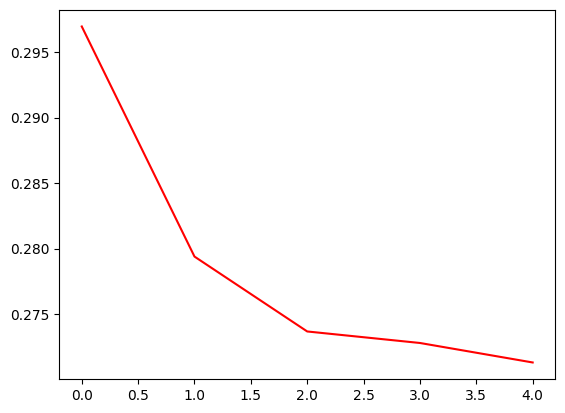

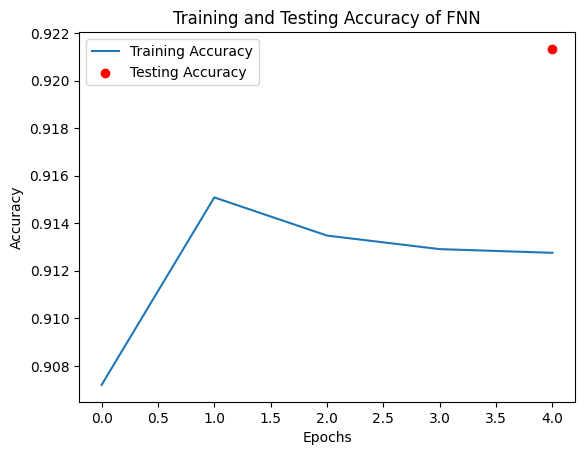

In [21]:
# This code is adapted from:
# Niven, Tim. (2019). FeedForward Neural Network Tutorial.
# Retrieved from https://www.kaggle.com/code/timniven/feedforward-neural-network-tutorial
# (Accessed: July 10, 2024).
import math
from keras import models, layers, optimizers, regularizers, metrics
import random
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm
from sklearn.utils import class_weight
from tensorflow.keras.metrics import Precision, Recall, AUC


X_train = TrainingDF
y_train = y
X_test = TestingDF
y_test = test_y

#balance data
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train.values.ravel())

# Create a dictionary to pass to the model
class_weight_dict = dict(enumerate(class_weights))


hidden_units = 10     # how many neurons in the hidden layer
activation = 'relu'   # activation function for hidden layer
l2 = 0.01             # regularization - how much we penalize large parameter values
learning_rate = 0.01  # how big our steps are in gradient descent
epochs = 5            # how many epochs to train for
batch_size = 16       # how many samples to use for each gradient descent update

# create a sequential model
model = models.Sequential()

features = len(TrainingDF.columns)

# add the hidden layer
model.add(layers.Dense(input_dim=features,
                       units=hidden_units,
                       activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer. add auc, precision, recall, and f1 score
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy', Precision(), Recall(), AUC()])

# Convert X_train and y_train to TensorFlow Tensors
X_train_tensor = tf.convert_to_tensor(X_train.values, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train.values, dtype=tf.float32)

# Convert X_test and y_test to TensorFlow Tensors
X_test_tensor = tf.convert_to_tensor(X_test.values, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test.values, dtype=tf.float32)

# train the parameters
history = model.fit(X_train_tensor, y_train_tensor, epochs=epochs, batch_size=batch_size, class_weight=class_weight_dict)

# Evaluate the model on the training set
train_metrics = model.evaluate(X_train_tensor, y_train_tensor, batch_size=32)
train_acc = train_metrics[1]
train_precision = train_metrics[2]
train_recall = train_metrics[3]
train_auc = train_metrics[4]

# Evaluate the model on the test set
test_metrics = model.evaluate(X_test_tensor, y_test_tensor, batch_size=32)
test_acc = test_metrics[1]
test_precision = test_metrics[2]
test_recall = test_metrics[3]
test_auc = test_metrics[4]

# Print the results
print('Training accuracy: %s' % train_acc)
print('Training precision: %s' % train_precision)
print('Training recall: %s' % train_recall)
print('Training AUC: %s' % train_auc)

print('Testing accuracy: %s' % test_acc)
print('Testing precision: %s' % test_precision)
print('Testing recall: %s' % test_recall)
print('Testing AUC: %s' % test_auc)

# loss with plot
losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

# Plot training accuracy
training_accuracy = history.history['accuracy']
plt.plot(training_accuracy, label='Training Accuracy')
plt.scatter(len(training_accuracy) - 1, test_acc, color='red', label='Testing Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy of FNN')
plt.legend()
plt.show()
